<a href="https://colab.research.google.com/github/candido05/ML_Projects/blob/main/ProjetoProgFunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mobile Price Classification

Link to the repository: [Repository](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)



In [76]:
import numpy as np
import pandas as pd

In [77]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")
train_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [78]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [79]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

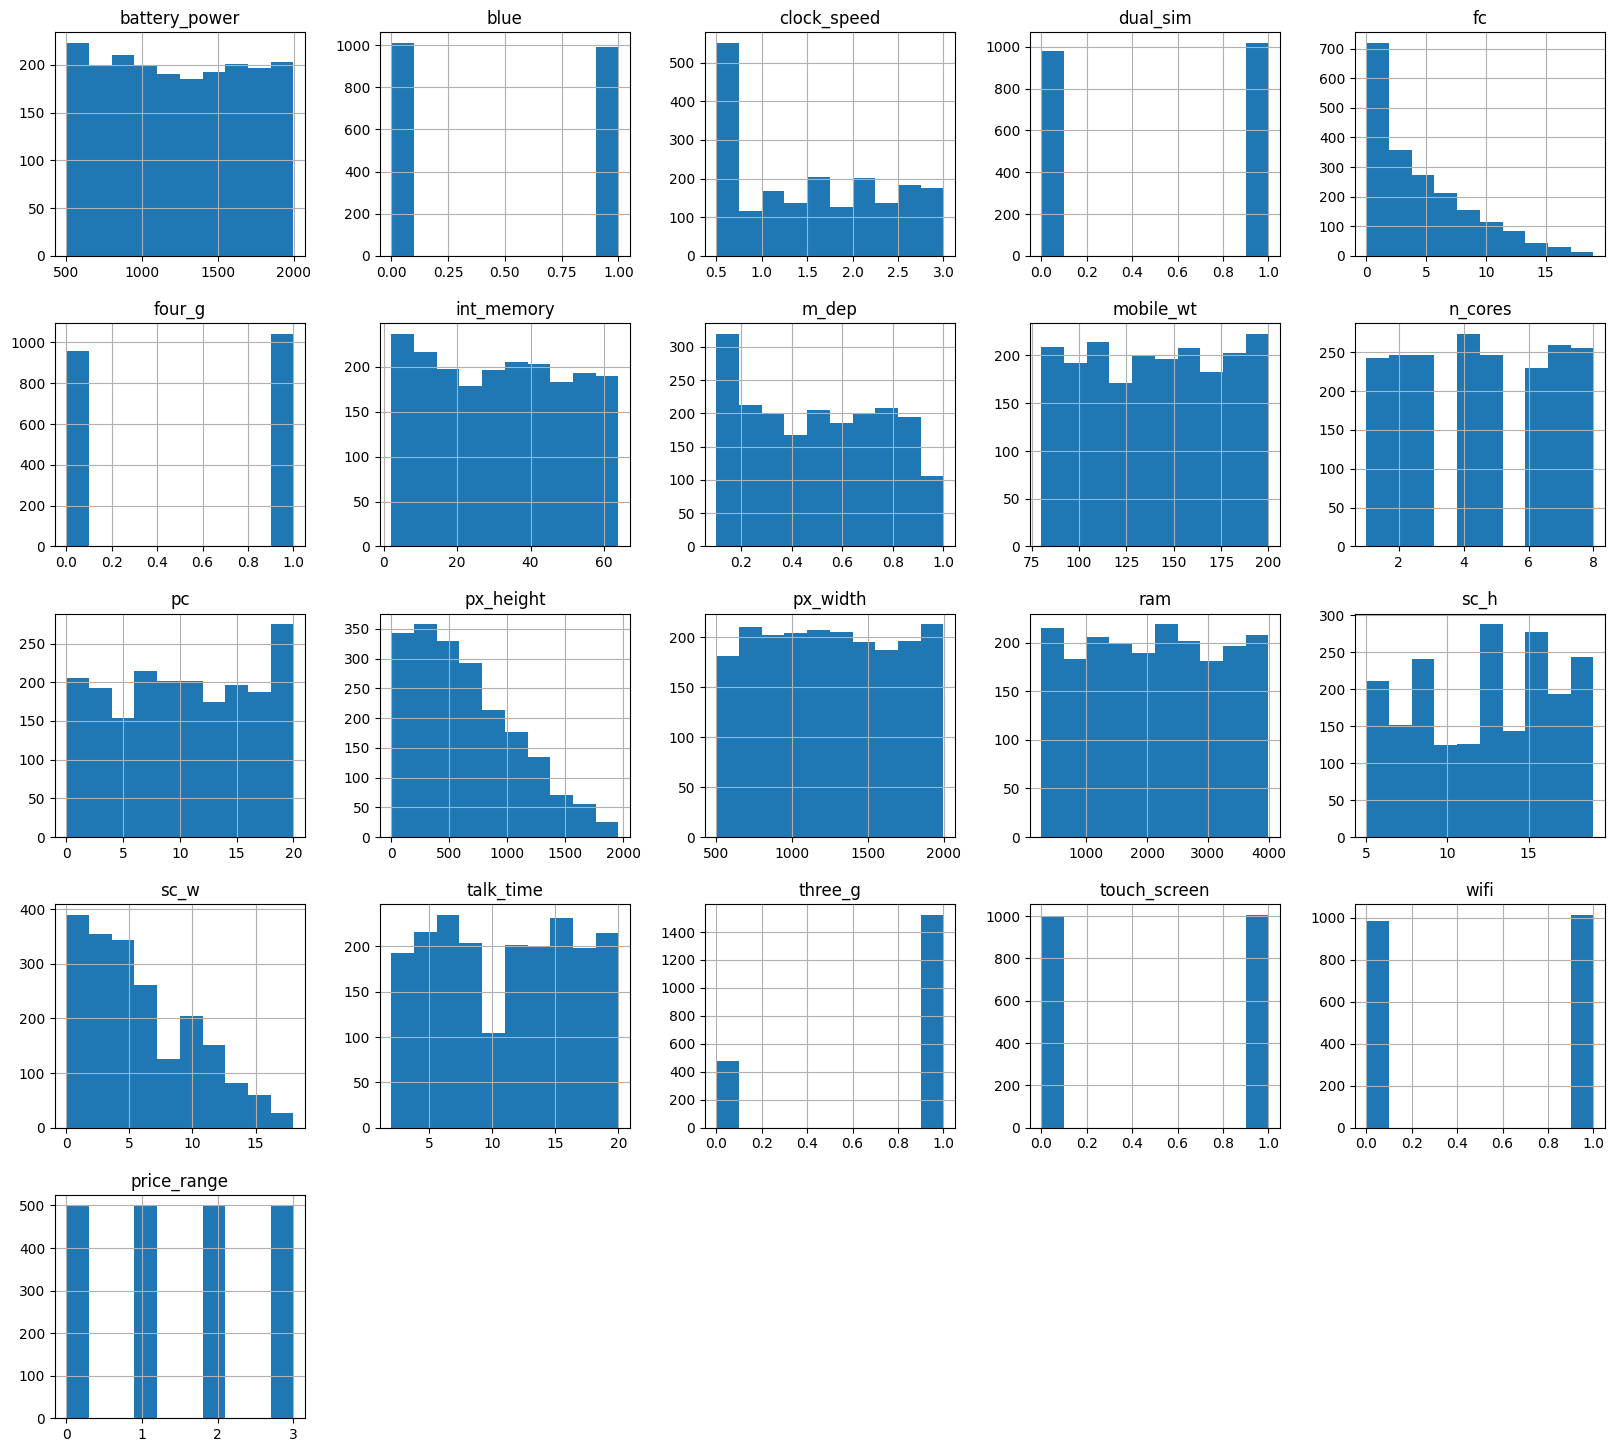

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

train_data.hist(figsize=(20, 18))
plt.show()

In [81]:
correlations = train_data.corr()["price_range"]
correlations

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

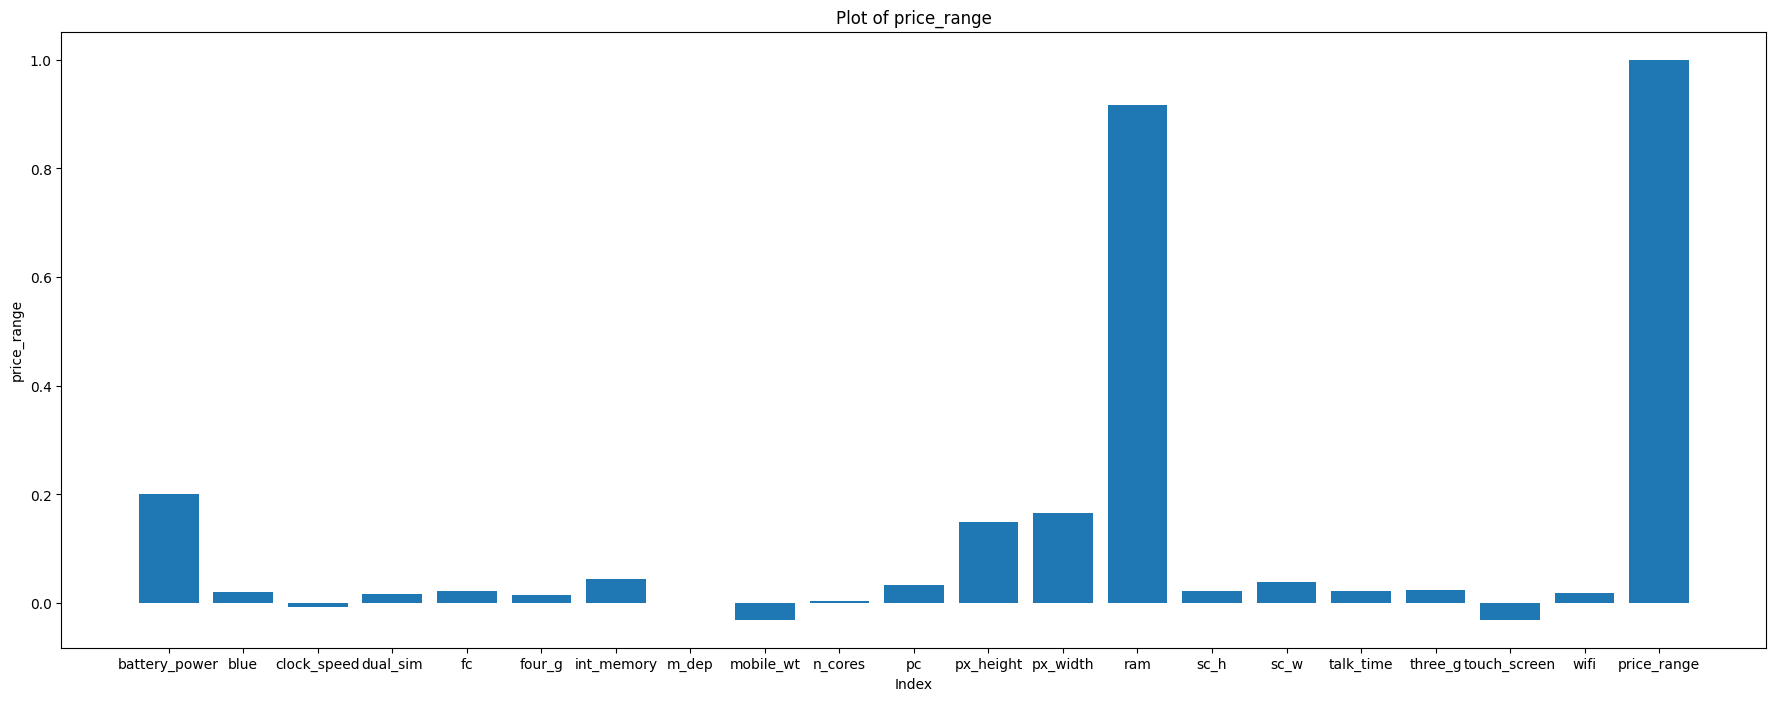

In [82]:
# Set the figure size
plt.figure(figsize=(22, 8))

# Plot the correlations
plt.bar(x=correlations.index, height=correlations.values)

# Add title and labels
plt.title("Plot of price_range")
plt.xlabel("Index")
plt.ylabel("price_range")

# Show the plot
plt.show()

É apresentado maior correlação nos preços com as seguinte variaveis: battery_power, px_height, px_width, ram

In [83]:
train_data["px_size"] = train_data['px_height'] * train_data['px_width']
correlations = train_data.corr()["price_range"]
correlations

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
px_size          0.176240
Name: price_range, dtype: float64

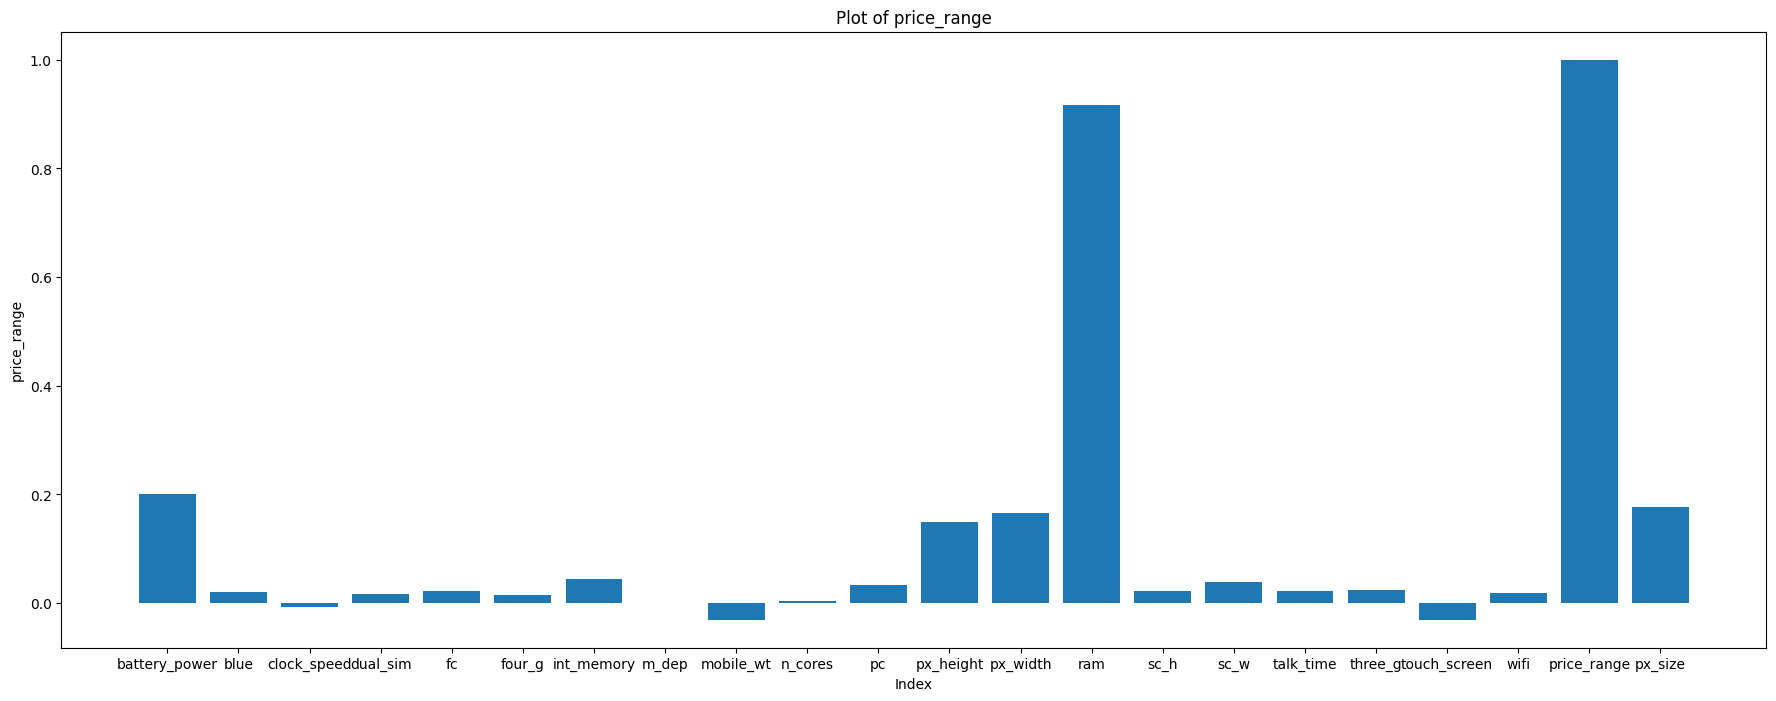

In [84]:
plt.figure(figsize=(22, 8))

# Plot the correlations
plt.bar(x=correlations.index, height=correlations.values)

# Add title and labels
plt.title("Plot of price_range")
plt.xlabel("Index")
plt.ylabel("price_range")

# Show the plot
plt.show()

Vendo a relação entre as variaveis mais proeminentes na analise e a variavel principal

In [85]:
# battery_power

medida = train_data.groupby('price_range')['battery_power'].mean()
variancia = train_data.groupby('price_range')['battery_power'].var()
desvio_padrao = train_data.groupby('price_range')['battery_power'].std()

resultados_battery = pd.concat([medida, variancia, desvio_padrao], axis=1)
resultados_battery.columns = ['Média', 'Variância', 'Desvio Padrão']
resultados_battery

,Média,Variância,Desvio Padrão
price_range,,,
0,1116.902,168757.711820,410.801305
1,1228.868,192382.703984,438.614528
2,1228.320,205084.955511,452.863065
3,1379.984,172218.576898,414.992261


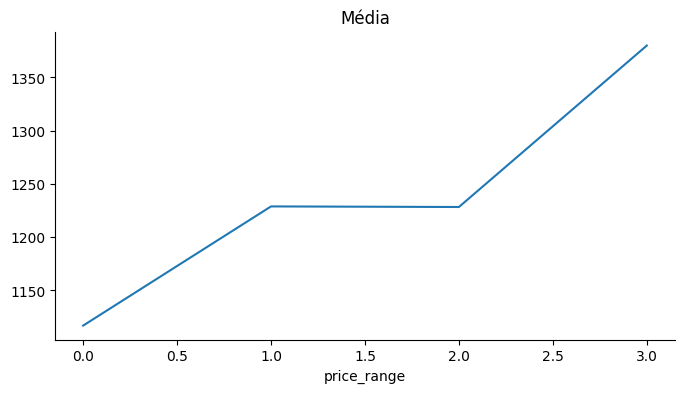

In [86]:
resultados_battery['Média'].plot(kind='line', figsize=(8, 4), title='Média')
plt.gca().spines[['top', 'right']].set_visible(False)

In [87]:
# px_height

medida = train_data.groupby('price_range')['px_height'].mean()
variancia = train_data.groupby('price_range')['px_height'].var()
desvio_padrao = train_data.groupby('price_range')['px_height'].std()

resultados_px_height = pd.concat([medida, variancia, desvio_padrao], axis=1)
resultados_px_height.columns = ['Média', 'Variância', 'Desvio Padrão']
resultados_px_height

,Média,Variância,Desvio Padrão
price_range,,,
0,536.408,138997.857251,372.824164
1,666.892,194790.890116,441.351209
2,632.284,198728.039423,445.789232
3,744.848,233985.211319,483.720179


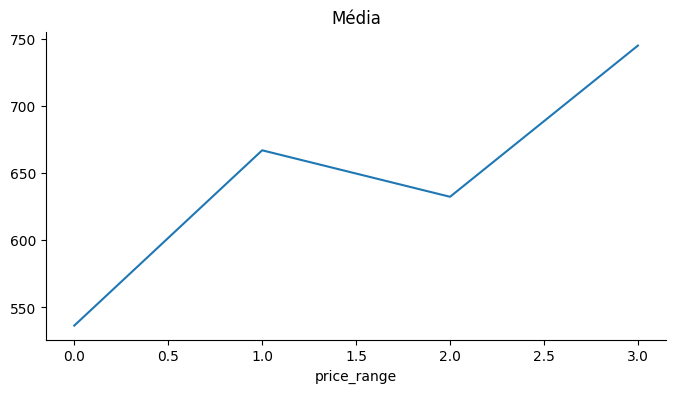

In [88]:
resultados_px_height['Média'].plot(kind='line', figsize=(8, 4), title='Média')
plt.gca().spines[['top', 'right']].set_visible(False)

In [89]:
# px_width

medida = train_data.groupby('price_range')['px_width'].mean()
variancia = train_data.groupby('price_range')['px_width'].var()
desvio_padrao = train_data.groupby('price_range')['px_width'].std()

resultados_px_width = pd.concat([medida, variancia, desvio_padrao], axis=1)
resultados_px_width.columns = ['Média', 'Variância', 'Desvio Padrão']
resultados_px_width

,Média,Variância,Desvio Padrão
price_range,,,
0,1150.270,170570.470040,413.001780
1,1251.908,187978.047631,433.564352
2,1234.046,182976.180244,427.757151
3,1369.838,182178.360477,426.823571


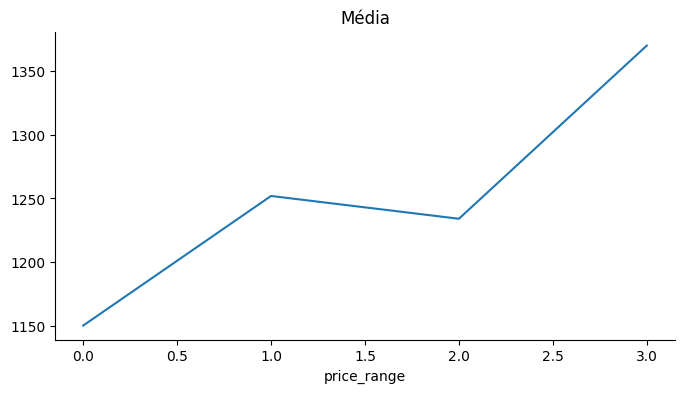

In [90]:
resultados_px_width['Média'].plot(kind='line', figsize=(8, 4), title='Média')
plt.gca().spines[['top', 'right']].set_visible(False)

In [91]:
# ram

medida = train_data.groupby('price_range')['ram'].mean()
variancia = train_data.groupby('price_range')['ram'].var()
desvio_padrao = train_data.groupby('price_range')['ram'].std()

resultados_ram = pd.concat([medida, variancia, desvio_padrao], axis=1)
resultados_ram.columns = ['Média', 'Variância', 'Desvio Padrão']
resultados_ram

,Média,Variância,Desvio Padrão
price_range,,,
0,785.314,131591.478361,362.755397
1,1679.490,217016.370641,465.850159
2,2582.816,246226.086317,496.211735
3,3449.232,154464.659495,393.019923


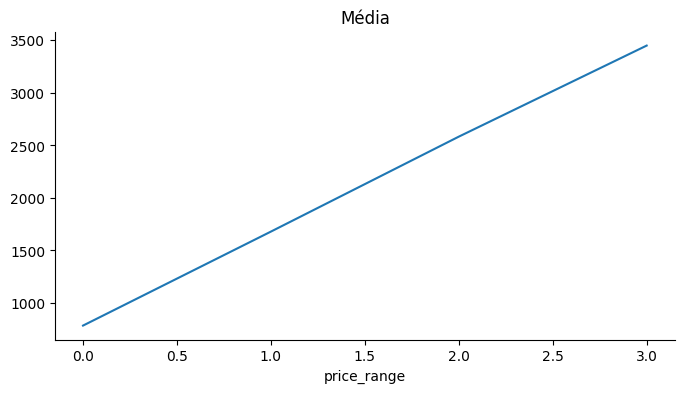

In [92]:
resultados_ram['Média'].plot(kind='line', figsize=(8, 4), title='Média')
plt.gca().spines[['top', 'right']].set_visible(False)

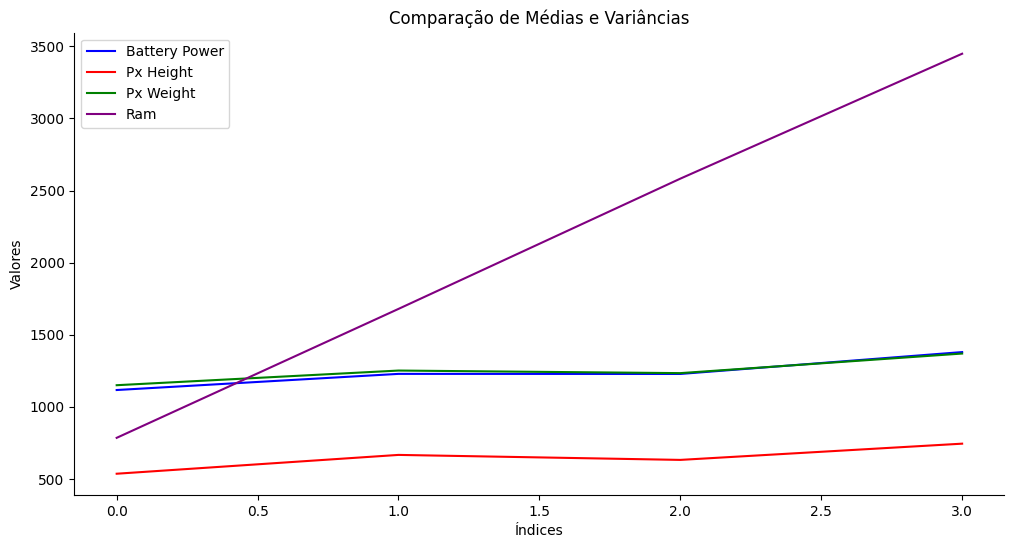

In [93]:
plt.figure(figsize=(12, 6))
resultados_battery['Média'].plot(kind='line', figsize=(12, 6), label='Battery Power', color='blue')
plt.gca().spines[['top', 'right']].set_visible(False)

resultados_px_height['Média'].plot(kind='line', label='Px Height', color='red')
plt.gca().spines[['top', 'right']].set_visible(False)

resultados_px_width['Média'].plot(kind='line', label='Px Weight', color='green')
plt.gca().spines[['top', 'right']].set_visible(False)

resultados_ram['Média'].plot(kind='line', label='Ram', color='purple')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.title("Comparação de Médias e Variâncias")
plt.xlabel("Índices")
plt.ylabel("Valores")
plt.legend()

plt.show()

In [94]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [95]:
test_data["px_size"] = test_data['px_height'] * test_data['px_width']

In [96]:
from sklearn.model_selection import train_test_split

df = train_data.copy()
X = df.drop(columns=['price_range'])
y = train_data['price_range']
X_test = test_data.drop(columns=['id'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)

(1600, 21)
(400, 21)
(1600,)
(400,)
(1000, 21)


In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=42)
}

pipelines = {}
for classifier_name, classifier in classifiers.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", classifier)
    ])
    pipeline.fit(X_train, y_train)
    pipelines[classifier_name] = pipeline

results = {}
for classifier_name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    results[classifier_name] = {
        "accuracy": accuracy,
        "classification_report": report
    }

for classifier_name, result in results.items():
    print(f"=== {classifier_name} ===")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])
    print("=" * 50)


=== RandomForestClassifier ===
Accuracy: 0.8975
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.87      0.87      0.87        91
           2       0.83      0.88      0.85        92
           3       0.95      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

=== GradientBoostingClassifier ===
Accuracy: 0.9100
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.91      0.90        91
           2       0.84      0.87      0.86        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      

In [98]:
predictions_df = pd.DataFrame(index=X_val.index)
predictions_df['price_range_original'] = y_val

for classifier_name, pipeline in pipelines.items():
    predictions_df[f'price_range_predict_{classifier_name}'] = pipeline.predict(X_val)

predictions_df.head(25)

,price_range_original,price_range_predict_RandomForestClassifier,price_range_predict_GradientBoostingClassifier,price_range_predict_LogisticRegression,price_range_predict_KNeighborsClassifier,price_range_predict_DecisionTreeClassifier,price_range_predict_SVC,price_range_predict_AdaBoostClassifier
1860,0,0,0,0,0,0,0,1
353,2,2,2,2,0,2,2,2
1333,1,1,1,1,0,1,1,1
905,3,3,3,3,2,3,3,2
1289,1,1,1,1,0,1,1,2
1273,1,2,1,1,1,2,1,2
938,2,2,2,2,1,2,2,2
1731,0,0,0,0,0,0,0,0
65,3,3,3,3,3,2,3,2
1323,1,1,1,1,1,1,1,1
